In [ ]:
import cv2
import numpy as np
import heapq

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importer les bibliothèques nécessaires
from google.colab import files  # Pour télécharger des fichiers
import cv2  # OpenCV pour le traitement vidéo
import os  # Pour les opérations sur les chemins de fichiers
import shutil  # utile pour zipper le dossier

# Définir la fonction pour extraire des images à partir d'une vidéo
def extract_images_from_video(video_path, output_folder, interval_seconds):
    # Vérifier si le dossier de sortie existe, sinon le créer
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Extraire le nom de la vidéo sans extension
    video_name = os.path.splitext(os.path.basename(video_path))[0]

    # Lire la vidéo pour obtenir ses propriétés
    video_capture = cv2.VideoCapture(video_path)
    fps = video_capture.get(cv2.CAP_PROP_FPS)  # Récupérer la fréquence d'images (FPS)
    interval_frames = int(fps * interval_seconds)  # Convertir l'intervalle en nombre de frames

    success, image = video_capture.read()  # Lire la première frame de la vidéo
    count = 0  # Initialiser un compteur pour le numéro de l'image extraite
    frame_count = 0  # Initialiser un compteur pour le numéro de frame dans la vidéo

    # Extraire les images de la vidéo à chaque intervalle spécifié
    while success:  # Tant que la lecture de la vidéo est réussie
        if frame_count % interval_frames == 0:  # Si le numéro de frame est un multiple de l'intervalle
            # Enregistrer l'image dans le dossier de sortie avec le nom de la vidéo et le numéro de frame
            image_output_path = os.path.join(output_folder, f"{video_name}_frame_{count}.jpg")
            cv2.imwrite(image_output_path, image)  # Enregistrer l'image
            count += 1  # Incrémenter le compteur d'image extraite
        success, image = video_capture.read()  # Lire la frame suivante de la vidéo
        frame_count += 1  # Incrémenter le compteur de frame

    # Libérer la capture vidéo
    video_capture.release()

# Définir le dossier contenant les vidéos dans Google Drive
videos_folder = "/content/drive/MyDrive/vid"

# Définir le dossier où enregistrer les images extraites localement
output_folder = "/content/Sauvée_Images"

# Intervalle en secondes entre chaque image extraite
interval_seconds = 2  # Par exemple, 2 secondes entre chaque image

# Parcourir tous les fichiers dans le dossier des vidéos
for video_file in os.listdir(videos_folder):
    # Vérifier si le fichier est une vidéo
    if os.path.isfile(os.path.join(videos_folder, video_file)) and video_file.endswith(('.mp4', '.avi', '.mov')):
        # Extraire les images de la vidéo en utilisant la fonction extract_images_from_video
        extract_images_from_video(os.path.join(videos_folder, video_file), output_folder, interval_seconds)

# Zipper le dossier pour faciliter le téléchargement
shutil.make_archive("/content/Saved_Images", 'zip', output_folder)

# Télécharger le fichier zip localement
files.download("/content/Saved_Images.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

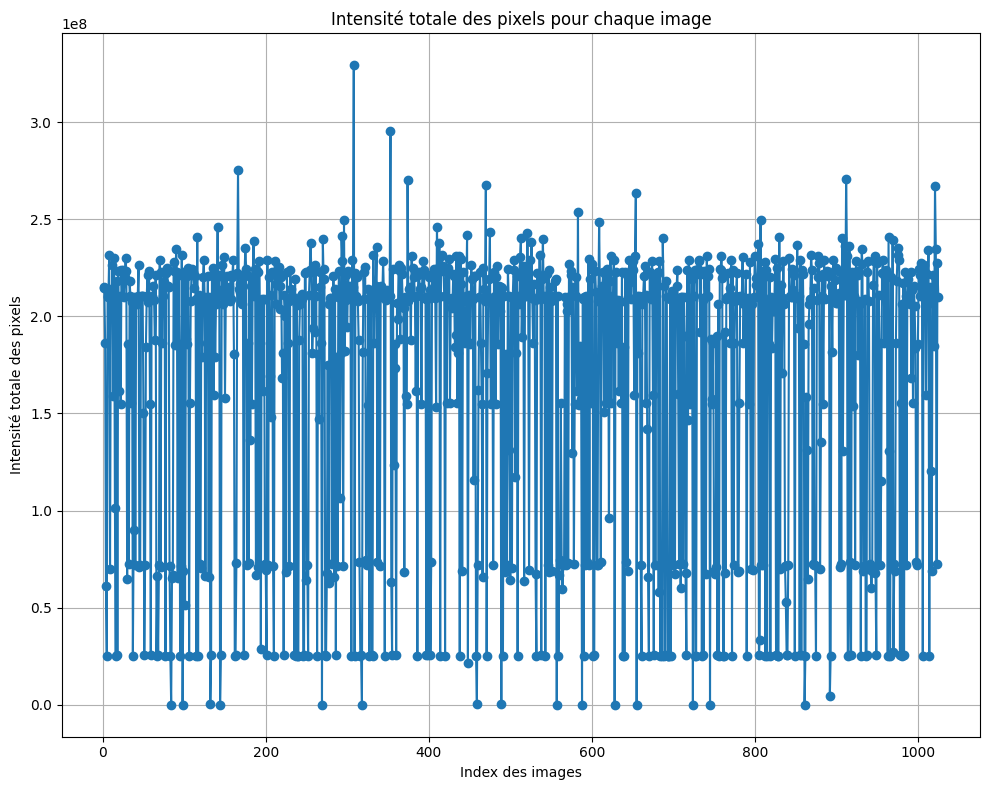

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def calculate_total_intensity(images_folder):
    # Liste pour stocker les noms des images et leurs intensités totales correspondantes
    images_intensity = []

    # Parcourir tous les fichiers dans le dossier des images
    for image_file in os.listdir(images_folder):
        # Chemin complet de l'image
        image_path = os.path.join(images_folder, image_file)

        # Lire l'image en niveaux de gris
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Calculer l'intensité totale des pixels de l'image
        total_intensity = image.sum()

        # Ajouter le nom de l'image et son intensité à la liste
        images_intensity.append((image_file, total_intensity))

    return images_intensity

def plot_intensity(images_intensity):
    # Extraire les noms d'images et leurs intensités en tant que listes séparées
    image_names, intensities = zip(*images_intensity)

    # Créer une liste d'index numérotés de 1 à N, où N est le nombre total d'images
    indices = list(range(1, len(image_names) + 1))

    # Tracer le graphique
    plt.figure(figsize=(10, 8))
    plt.plot(indices, intensities, marker='o', linestyle='-')
    plt.title('Intensité totale des pixels pour chaque image')
    plt.xlabel('Index des images')
    plt.ylabel('Intensité totale des pixels')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Définir le chemin vers le dossier contenant les images extraites
images_folder = "/content/drive/MyDrive/Saved_Images"

# Calculer l'intensité totale des pixels pour chaque image dans le dossier
images_intensity = calculate_total_intensity(images_folder)

# Tracer le graphique d'intensité totale avec numérotation des images
plot_intensity(images_intensity)


In [ ]:
from google.colab import files


def save_images(images_folder, low_intensity_folder, high_intensity_folder):
    # Créer les dossiers de sortie s'ils n'existent pas
    os.makedirs(low_intensity_folder, exist_ok=True)
    os.makedirs(high_intensity_folder, exist_ok=True)

    # Parcourir les images et les copier dans les dossiers appropriés
    for image_name, intensity in images_intensity:
        image_path = os.path.join(images_folder, image_name)
        if intensity < 1.5e8:
            shutil.copy(image_path, low_intensity_folder)
        else:
            shutil.copy(image_path, high_intensity_folder)

# Définir les chemins vers les dossiers de sortie pour les images de faible et forte intensité
low_intensity_folder = "/content/images_faible_intensite3"
high_intensity_folder = "/content/images_forte_intensite3"

# Appeler la fonction pour sauvegarder les images dans les dossiers correspondants
save_images(images_folder, low_intensity_folder, high_intensity_folder)

# Zipper les dossiers pour faciliter le téléchargement
shutil.make_archive("/content/images_faible_intensite", 'zip', low_intensity_folder)
shutil.make_archive("/content/images_forte_intensite", 'zip', high_intensity_folder)

# Télécharger les fichiers zip localement
files.download("/content/images_faible_intensite.zip")
files.download("/content/images_forte_intensite.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Autres Options**

In [ ]:
import cv2
import os
import shutil

def classify_images(input_folder, output_folder_clear, output_folder_dark, brightness_threshold, gradient_threshold):
    if not os.path.exists(output_folder_clear):
        os.makedirs(output_folder_clear)
    if not os.path.exists(output_folder_dark):
        os.makedirs(output_folder_dark)

    for image_file in os.listdir(input_folder):
        if image_file.endswith('.jpg'):
            image_path = os.path.join(input_folder, image_file)
            image = cv2.imread(image_path)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            brightness = cv2.mean(gray)[0]
            gradient = cv2.Laplacian(gray, cv2.CV_64F).var()

            if brightness > brightness_threshold and gradient > gradient_threshold:
                shutil.copy(image_path, output_folder_clear)
            else:
                shutil.copy(image_path, output_folder_dark)

input_folder = "/content/drive/MyDrive/Saved_Images (1)"
output_folder_clear = "/content/Clear_Images"
output_folder_dark = "/content/Dark_Images"
brightness_threshold = 30  # ajustez ce seuil selon votre besoin
gradient_threshold = 30    # ajustez ce seuil selon votre besoin

classify_images(input_folder, output_folder_clear, output_folder_dark, brightness_threshold, gradient_threshold)


In [ ]:
from google.colab import files
import shutil

# Chemin vers les dossiers d'images classées
clear_images_folder = "/content/Clear_Images"
dark_images_folder = "/content/Dark_Images"

# Créer des fichiers zip pour les dossiers d'images classées
shutil.make_archive("/content/Clear_Images", 'zip', clear_images_folder)
shutil.make_archive("/content/Dark_Images", 'zip', dark_images_folder)

# Télécharger les fichiers zip localement
files.download("/content/Clear_Images.zip")
files.download("/content/Dark_Images.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>